In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
import operator

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.stats as ss

In [13]:
RANDOM_STATE=11
np.random.seed(RANDOM_STATE)

In [14]:
mnist = datasets.load_digits()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(np.array(mnist.data), mnist.target, test_size=0.33, random_state=RANDOM_STATE)

In [6]:
def distance(instance1, instance2, length): # 두 객체 사이 거리를 구하는 함수이다. (유클리드, L2)
    distance = 0
    for x in range(length):
        distance += pow((instance1 - instance2), 2)
    return np.sqrt(distance)

In [7]:
def knn(trainSet, testInstance, y_train, k=5): # 테스트 객체 하나를 넣으면 train 하나씩과 거리를 계산하고 그 train target을 함께 저장한다.
    distances = []  # target과 거리가 들어갈 리스트이다.
    length = len(testInstance)-1 # test 객체의 길이만큼 반복한다.(64회)
    for x in range(len(trainSet)): 
        dist = distance(testInstance, trainSet[x], length) # 넣은 test객체와 trainset간의 거리를 모두 계산한다.
        distances.append((y_train[x], dist.mean())) # (글씨(0~9,target), 거리(행렬의 평균)) 튜플형식으로 distances 리스트에 저장한다.
    distances.sort(key=operator.itemgetter(1)) # [(target,거리),(target,거리),(target,거리)..] 인 리스트에서 거리를 기준으로 리스트를 정렬한다.

    neighbors = []
    for x in range(k): # 정렬된 리스트의 k개를 neighbors에 저장한다.
        neighbors.append(distances[x][0])
    
    return (distances, neighbors)

In [8]:
def vote(neighbors): # 구한 k개의 neighbors들 중 가장 많이 나온 target을 구한다.
    vote_counts={}
    for vote in neighbors: # neighbors list 안에 해당 글자가 있으면 +1 아니면 1을 유지한다.
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1   # example : {4:2, 1:3 (target, 빈도)}
    keys= list(vote_counts.keys()) # key값들만 저장된 리스트이다.
    val=list(vote_counts.values()) # values 값들만 저장된 리스트이다.
    
    return keys[val.index(max(val))] # values중에 가장 높은 값의 인덱스를 구하고 그 인덱스를 키 값에 주면 가장 많이나온 target을 구할 수 있다.

In [9]:
def getAccuracy(testSet, predictions): # y_test와 비교한 정확도를 구할 수 있다.
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [30]:
pred_lst=[vote(knn(X_train, i, y_train)[1]) for i in X_test] 

In [98]:
getAccuracy(y_test, pred_lst)

97.97979797979798

In [79]:
distances=[knn(X_train, i, y_train)[0] for i in X_test] # 속도를 위해 distance를 미리 저장해준다.(test,train 사이 거리는 한번만 계산하면 된다.)

In [114]:
def pred_knn(k): # k를 주면 k개만큼의 이웃을 구해 x_test에 대한 예상 분류값(594개)가 있는 list를 반환하는 함수이다.
    pred_lst=[]
    for i in distances:
        neighbors = []
        for x in range(k): 
            neighbors.append(i[x][0])
        pred_lst.append(vote(neighbors))
    return pred_lst

In [119]:
acc_lst=[]

In [122]:
for i in range(1,21): # k가 1~20일 때 정확도를 구해 list에 추가해준다.
    acc_lst.append(getAccuracy(y_test,pred_knn(i)))

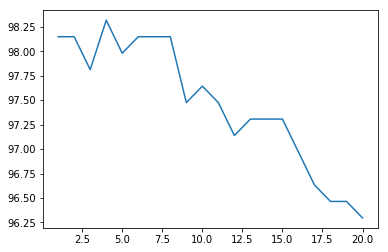

In [126]:
plt.plot(range(1,21), acc_lst) # 그래프로 확인한다.